In [17]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [57]:
video_path = os.path.join(os.getcwd(), 'Dino.avi')
video = cv2.VideoCapture(video_path)
if not video.isOpened():
    print("Failed to open the video file.")
    exit()


### Retrieve Metadata

In [58]:
frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
fps = video.get(cv2.CAP_PROP_FPS)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
duration = frame_count / fps


print("Frame count:", frame_count)
print("FPS:", fps)
print("Width:", width)
print("Height:", height)
print("Duration:", duration, "seconds")


Frame count: 210
FPS: 31.579612202362156
Width: 878
Height: 824
Duration: 6.649859999999999 seconds


Generate frames from the video

In [59]:
os.makedirs('frames', exist_ok=True)

In [60]:
for frame_index in range(frame_count):
    ret, frame = video.read()
    if not ret:
        break
   # Save the frame as an image
    image_path = os.path.join('frames', f"frame_{frame_index}.jpg")
    cv2.imwrite(image_path, frame)

# Release the video capture object
video.release()
cv2.destroyAllWindows()

## Feature Extraction

Detect and extract distinctive features from the images. Use feature extraction algorithms like SIFT, SURF, or ORB to identify key points or regions.

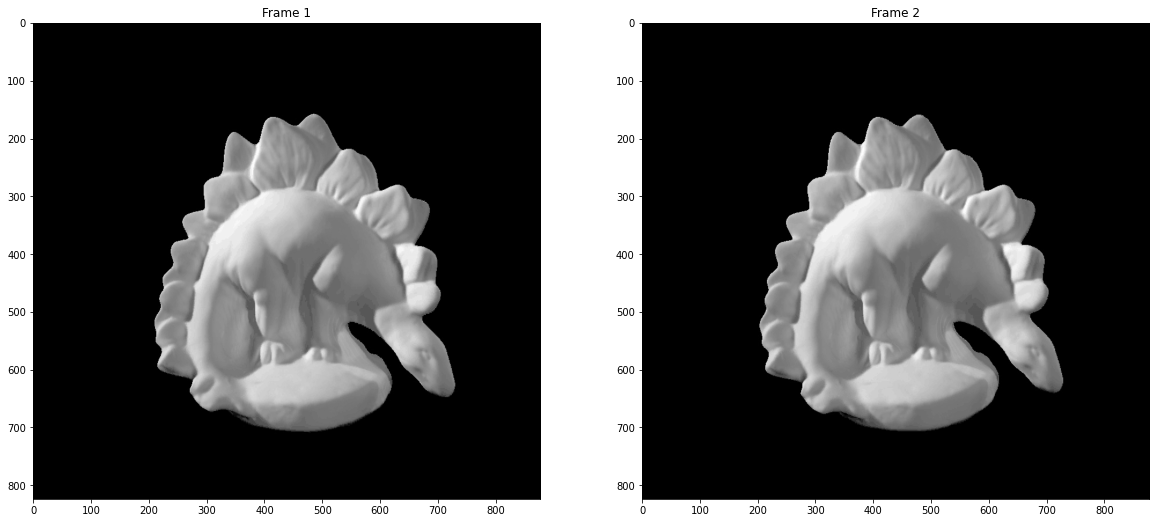

In [30]:
frames_path = os.path.join(os.getcwd(), 'frames')
frames = os.listdir(frames_path)

# load the first two frames
frame1 = cv2.imread(os.path.join(frames_path, frames[0]))
frame2 = cv2.imread(os.path.join(frames_path, frames[1]))

# convert to grayscale
frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# display the frames
fx, plots = plt.subplots(1, 2, figsize=(20,10))
plots[0].set_title("Frame 1")
plots[0].imshow(frame1_gray, cmap="gray")
plots[1].set_title("Frame 2")
plots[1].imshow(frame2_gray, cmap="gray")

Number of Keypoints Detected In The Training Image:  232
Number of Keypoints Detected In The Query Image:  233


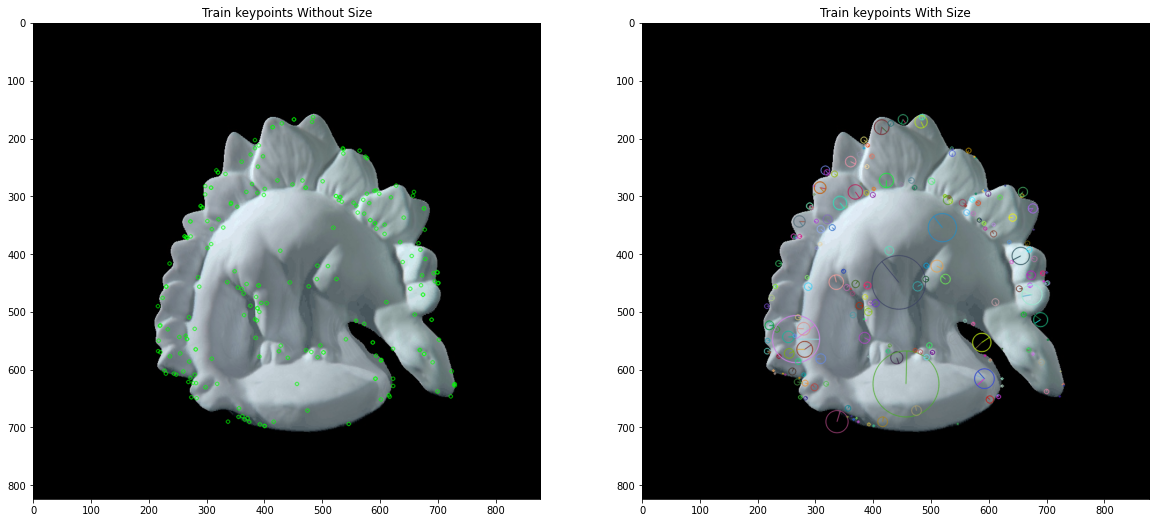

In [31]:
# detect the keypoints using SIFT
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT in each frame
kp1, des1 = sift.detectAndCompute(frame1_gray, None)
kp2, des2 = sift.detectAndCompute(frame2_gray, None)

keypoints_without_size = np.copy(frame1)
keypoints_with_size = np.copy(frame1)

cv2.drawKeypoints(frame1, kp1, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(frame1, kp1, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fx, plots = plt.subplots(1, 2, figsize=(20,10))
plots[0].set_title("Train keypoints Without Size")
plots[0].imshow(keypoints_without_size, cmap="gray")
plots[1].set_title("Train keypoints With Size")
plots[1].imshow(keypoints_with_size, cmap="gray")

# print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(kp1))
# print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(kp2))


### Matching Keypoints

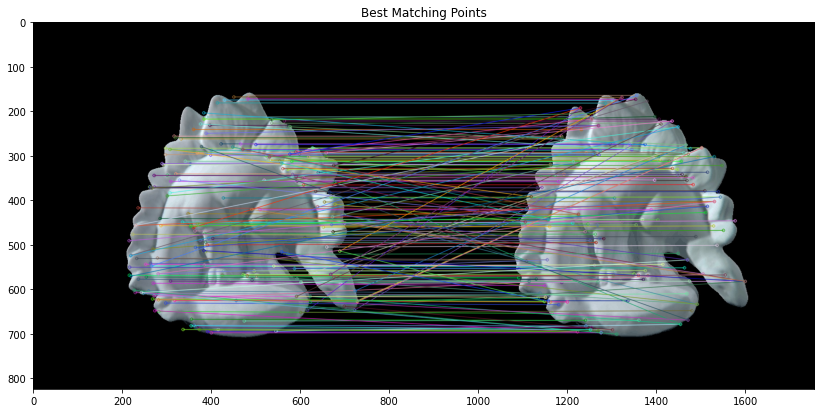


Number of Matching Keypoints Between The Training And Query Images:  232


In [32]:
# create a Brute force matcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(des1, des2)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(frame1, kp1, frame2, kp2, matches, None, flags = 2)

plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training And Query Images: ", len(matches))